#### Mating data process pipeline

In [14]:
import sys
sys.path.append("../")
sys.path.append("../deepYeast/")
sys.path.append("../deepYeast/deeplab/")

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from cellmating.utils import file_traverse
from cellmating.io import imread, imsave

#### load image

In [2]:
root = "../example_data/ep_mating_YAV2104xYAV2105_005_05_rigid.tif/"
file_list = file_traverse(root, file_regular=r".*.tif")

In [3]:
file_name = file_list[0]
image = imread(file_name)
image = np.moveaxis(image, -1, 1)

### segment

In [4]:
from script_wlli.segment import load_segment_model, segment

2024-04-04 14:28:26.173529: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
model = load_segment_model()

/home/wlli/project_in_wd/deepYeast/model/v_1.0.0/checkpoint
/home/wlli/project_in_wd/deepYeast/model/v_1.0.0/checkpoint
restoring or initializing model...
restored model from /home/wlli/project_in_wd/deepYeast/model/v_1.0.0/checkpoint/ckpt-100000.
restored from checkpoint: /home/wlli/project_in_wd/deepYeast/model/v_1.0.0/checkpoint/ckpt-100000


In [8]:
seg_image = segment(model, image[0:3, 0])

100%|██████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:42<00:00, 14.30s/it]


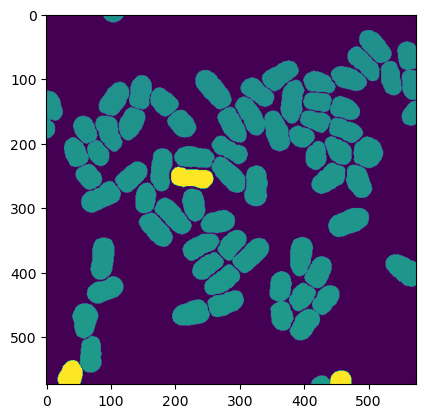

In [13]:
# concatenate = np.concatenate((image, np.expand_dims(seg_image, axis=1)),axis=1)
# imsave(save_path, concatenate, dtype=np.uint16, imagej=True)
plt.imshow(seg_image[0])

#### tracing

In [12]:
from script_wlli.tracking import tracking

In [13]:
tracked = tracking(image[:, 0:4], 3, is_save_tracker=True)

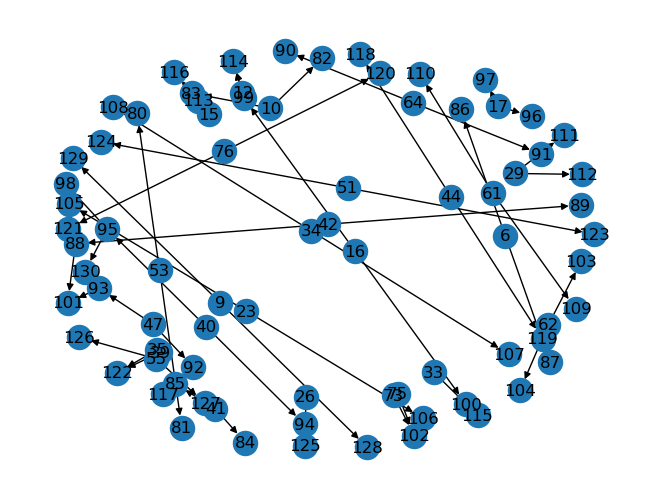

In [16]:
nx.draw(tracked[1].network, with_labels=True)

In [ ]:
# save_name = file_name[:-4]+"_traced.tif"
# imsave(save_name, tracked[0], imagej=True)
# dump_to_pkl(tracked[1].network, save_name[:-4]+".network")
# dump_to_pkl(tracked[1].trackers, save_name[:-4]+".tracker")